In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
t_train = pd.read_csv("C:\\Users\\Harshita\\Desktop\\House_Prices\\train.csv")
t_test = pd.read_csv("C:\\Users\\Harshita\\Desktop\\House_Prices\\test.csv")

In [3]:
t_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
t_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [5]:
print(t_train.info())
print('-'*50)
print(t_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
t_train.isnull().sum()



Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
t_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [8]:
t_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
t_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [10]:
t_test.nunique()

Id               1459
MSSubClass         16
MSZoning            5
LotFrontage       115
LotArea          1106
                 ... 
MiscVal            26
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
Length: 80, dtype: int64

In [11]:
cat = []
con = []
for i in t_train.columns:
    if(t_train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)


In [12]:
#t_train[con].dropna()
t_train['LotFrontage'] = t_train['LotFrontage'].fillna(t_train['LotFrontage'].mean())
t_train['GarageYrBlt'] = t_train['GarageYrBlt'].fillna(t_train['GarageYrBlt'].mean())
t_train['MasVnrArea'] = t_train['MasVnrArea'].fillna(t_train['MasVnrArea'].mean())


In [13]:
t_train[con].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [14]:
t_train.shape

(1460, 81)

In [15]:
cat_t= []
con_t = []
for i in t_test.columns:
    if(t_test[i].dtypes == "object"):
        cat_t.append(i)
    else:
        con_t.append(i)

In [16]:
t_test['LotFrontage'] = t_test['LotFrontage'].fillna(t_test['LotFrontage'].mean())
t_test['GarageYrBlt'] = t_test['GarageYrBlt'].fillna(t_test['GarageYrBlt'].mean())
t_test['MasVnrArea'] = t_test['MasVnrArea'].fillna(t_test['MasVnrArea'].mean())
t_test['BsmtFinSF1'] = t_test['BsmtFinSF1'].fillna(t_test['BsmtFinSF1'].mean())
t_test['BsmtFinSF2'] = t_test['BsmtFinSF2'].fillna(t_test['BsmtFinSF2'].mean())
t_test['BsmtUnfSF'] = t_test['BsmtUnfSF'].fillna(t_test['BsmtUnfSF'].mean())
t_test['BsmtFullBath'] = t_test['BsmtFullBath'].fillna(t_test['BsmtFullBath'].mean())
t_test['BsmtHalfBath'] = t_test['BsmtHalfBath'].fillna(t_test['BsmtHalfBath'].mean())
t_test['GarageCars'] = t_test['GarageCars'].fillna(t_test['GarageCars'].mean())
t_test['GarageArea'] = t_test['GarageArea'].fillna(t_test['GarageArea'].mean())
t_test['TotalBsmtSF'] = t_test['TotalBsmtSF'].fillna(t_test['TotalBsmtSF'].mean())

In [17]:
t_test[con_t].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [18]:
t_test[con_t].shape

(1459, 37)

In [19]:
t_train[cat].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [20]:
t_train['GarageCond'] = t_train['GarageCond'].fillna(t_train['GarageCond'].mode()[0])
t_train['GarageQual'] = t_train['GarageQual'].fillna(t_train['GarageQual'].mode()[0])
t_train['GarageFinish'] = t_train['GarageFinish'].fillna(t_train['GarageFinish'].mode()[0])
t_train['GarageType'] = t_train['GarageType'].fillna(t_train['GarageType'].mode()[0])
t_train['FireplaceQu'] = t_train['FireplaceQu'].fillna(t_train['FireplaceQu'].mode()[0])
t_train['Electrical'] = t_train['Electrical'].fillna(t_train['Electrical'].mode()[0])
t_train['BsmtQual'] = t_train['BsmtQual'].fillna(t_train['BsmtQual'].mode()[0])
t_train['BsmtCond'] = t_train['BsmtCond'].fillna(t_train['BsmtCond'].mode()[0])
t_train['BsmtExposure'] = t_train['BsmtExposure'].fillna(t_train['BsmtExposure'].mode()[0])
t_train['BsmtFinType1'] = t_train['BsmtFinType1'].fillna(t_train['BsmtFinType1'].mode()[0])
t_train['BsmtFinType2'] = t_train['BsmtFinType2'].fillna(t_train['BsmtFinType2'].mode()[0])
t_train['MasVnrType'] = t_train['MasVnrType'].fillna(t_train['MasVnrType'].mode()[0])

In [21]:
t_train[cat].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinType2        0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         0
Functional          0
FireplaceQu         0
GarageType          0
GarageFinish        0
GarageQual          0
GarageCond          0
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [22]:
t_train[cat].shape

(1460, 43)

In [23]:
t_train = t_train.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1)

In [24]:
t_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [25]:
t_test[cat].isnull().sum()

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In [26]:
t_test['MSZoning'] = t_test['MSZoning'].fillna(t_test['MSZoning'].mode()[0])
t_test['SaleType'] = t_test['SaleType'].fillna(t_test['SaleType'].mode()[0])
t_test['GarageFinish'] = t_test['GarageFinish'].fillna(t_test['GarageFinish'].mode()[0])
t_test['GarageType'] = t_test['GarageType'].fillna(t_test['GarageType'].mode()[0])
t_test['FireplaceQu'] = t_test['FireplaceQu'].fillna(t_test['FireplaceQu'].mode()[0])
t_test['GarageQual'] = t_test['GarageQual'].fillna(t_test['GarageQual'].mode()[0])
t_test['BsmtQual'] = t_test['BsmtQual'].fillna(t_test['BsmtQual'].mode()[0])
t_test['BsmtCond'] = t_test['BsmtCond'].fillna(t_test['BsmtCond'].mode()[0])
t_test['BsmtExposure'] = t_test['BsmtExposure'].fillna(t_test['BsmtExposure'].mode()[0])
t_test['BsmtFinType1'] = t_test['BsmtFinType1'].fillna(t_test['BsmtFinType1'].mode()[0])
t_test['BsmtFinType2'] = t_test['BsmtFinType2'].fillna(t_test['BsmtFinType2'].mode()[0])
t_test['MasVnrType'] = t_test['MasVnrType'].fillna(t_test['MasVnrType'].mode()[0])
t_test['Utilities'] = t_test['Utilities'].fillna(t_test['Utilities'].mode()[0])
t_test['Exterior1st'] = t_test['Exterior1st'].fillna(t_test['Exterior1st'].mode()[0])
t_test['Exterior2nd'] = t_test['Exterior2nd'].fillna(t_test['Exterior2nd'].mode()[0])
t_test['KitchenQual'] = t_test['KitchenQual'].fillna(t_test['KitchenQual'].mode()[0])
t_test['FireplaceQu'] = t_test['FireplaceQu'].fillna(t_test['FireplaceQu'].mode()[0])
t_test['GarageCond'] = t_test['GarageCond'].fillna(t_test['GarageCond'].mode()[0])
t_test['Functional'] = t_test['Functional'].fillna(t_test['Functional'].mode()[0])

In [27]:
t_test[cat].isnull().sum()

MSZoning            0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinType2        0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         0
Functional          0
FireplaceQu         0
GarageType          0
GarageFinish        0
GarageQual          0
GarageCond          0
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            0
SaleCondition       0
dtype: int64

In [28]:
t_test = t_test.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1)

In [29]:
t_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 76, dtype: int64

In [30]:
t_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [31]:
cat = []
con = []
for i in t_train.drop(['Id','MSSubClass','OverallQual','OverallCond'],1).columns:
    if(t_train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

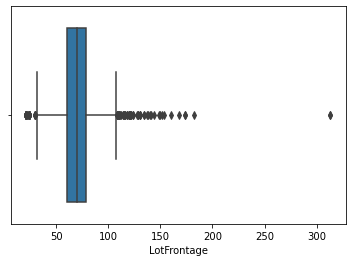

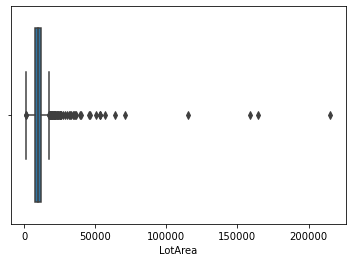

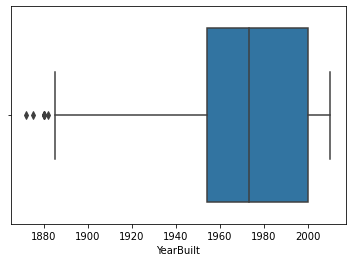

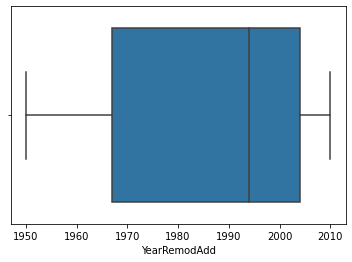

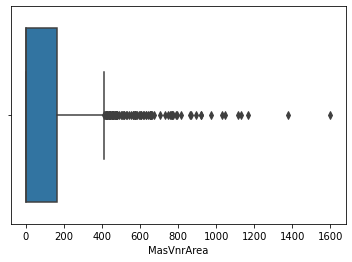

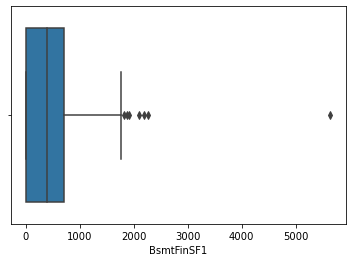

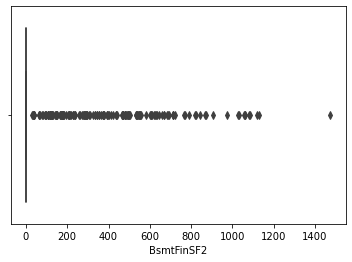

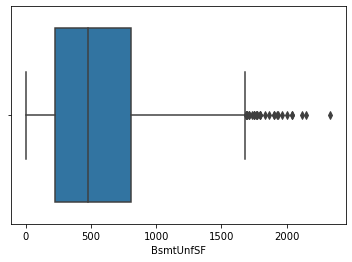

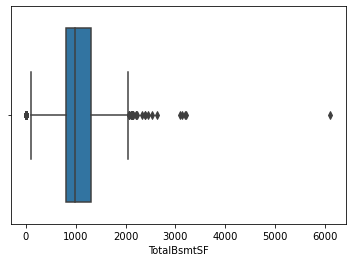

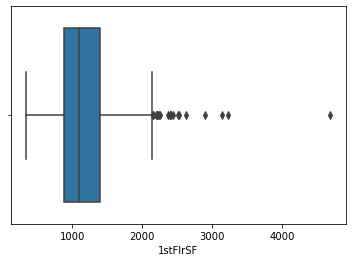

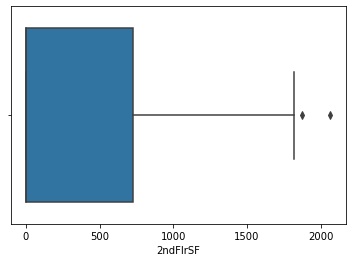

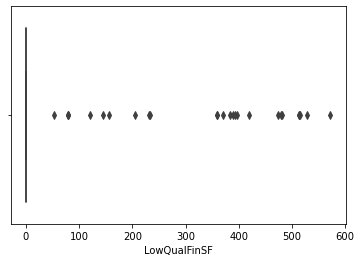

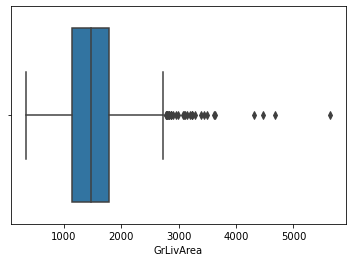

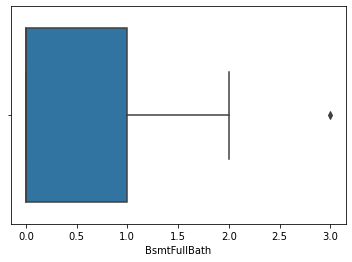

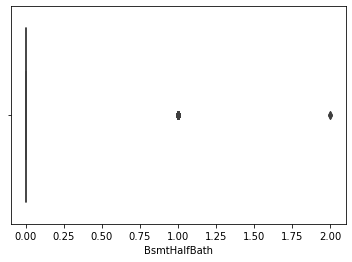

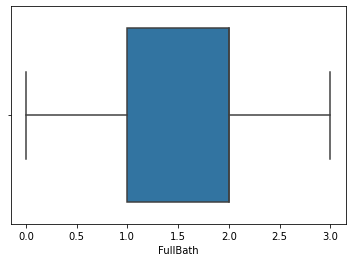

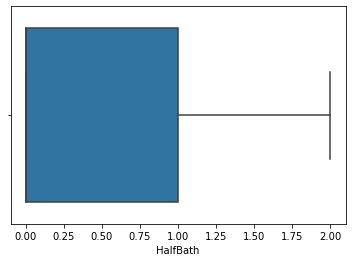

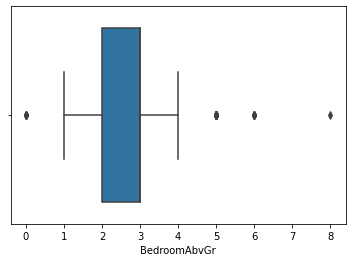

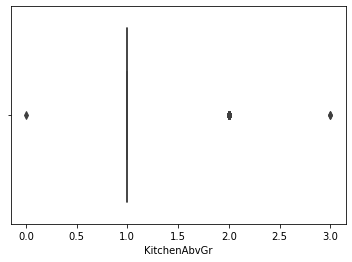

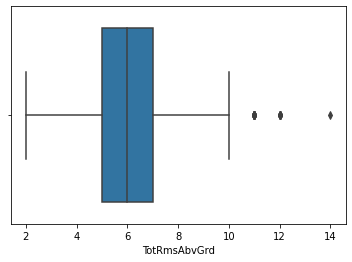

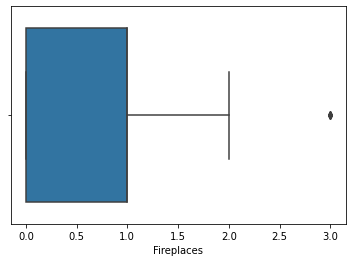

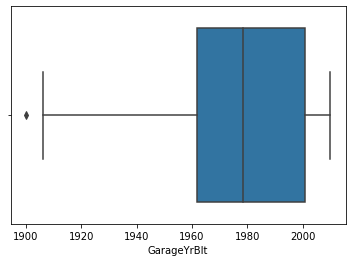

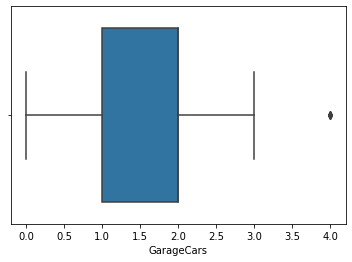

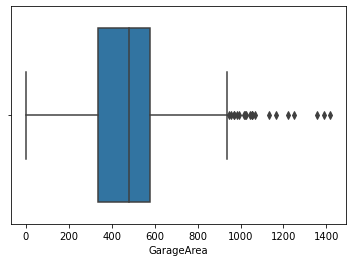

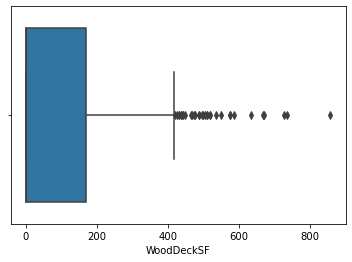

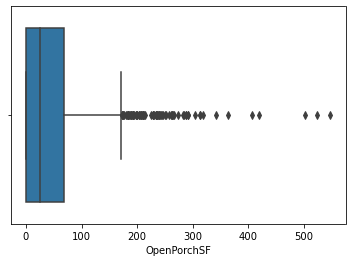

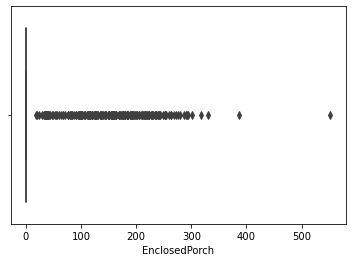

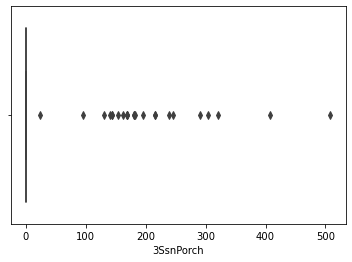

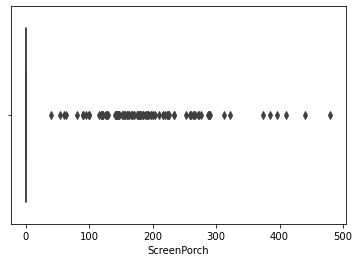

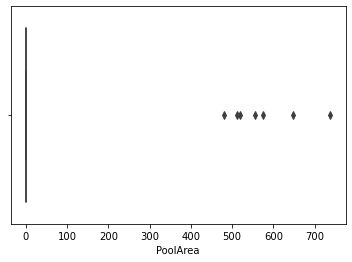

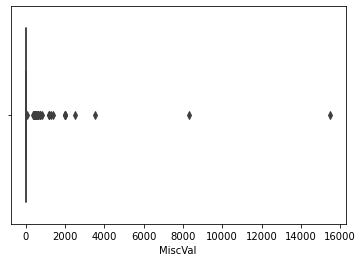

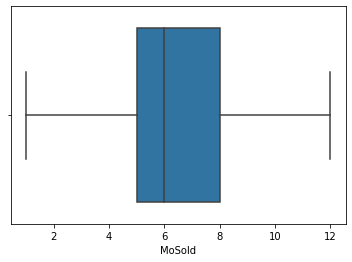

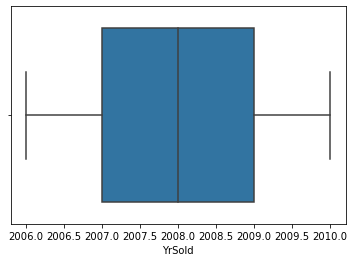

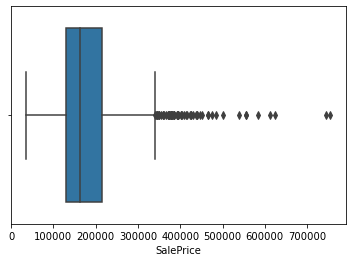

In [32]:
for i in con:
    sb.boxplot(t_train[i])
    plt.show()

In [33]:
def mod_outlier(t_train):
    
    t_train1 = t_train.copy()
    t_train = t_train._get_numeric_data()


    q1 = t_train.quantile(0.25)
    q3 = t_train.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)


    for col in t_train.columns:
        for i in range(0,len(t_train[col])):
            
        
            if t_train[col][i] < lower_bound[col]:
                t_train[col][i] = lower_bound[col]
                

            if t_train[col][i] > upper_bound[col]:
                
                t_train[col][i] = upper_bound[col]
                


    for col in t_train.columns:
                    
        t_train1[col] = t_train[col]
    return(t_train1)

t_train = mod_outlier(t_train)


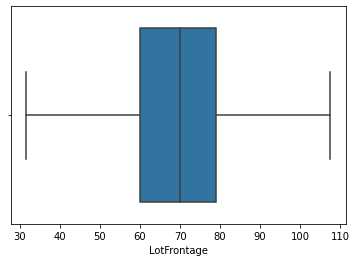

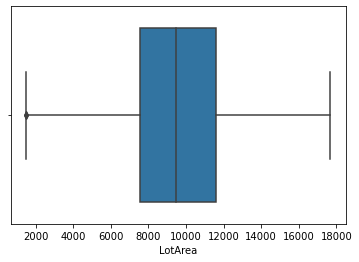

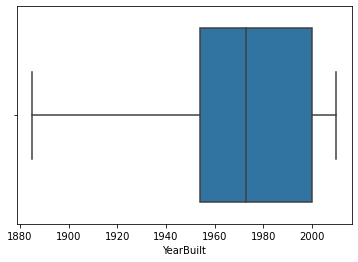

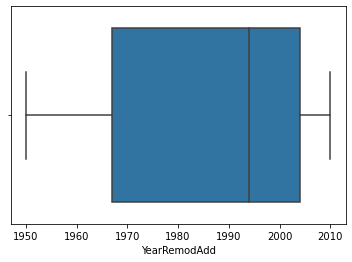

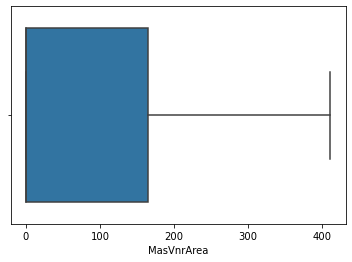

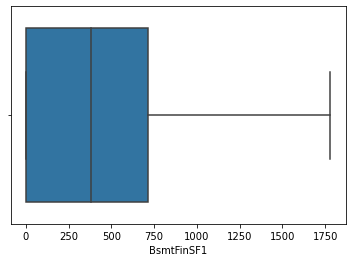

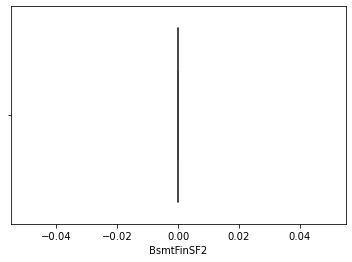

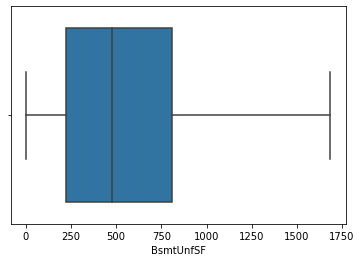

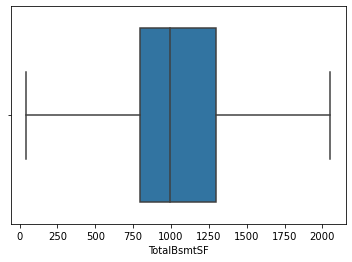

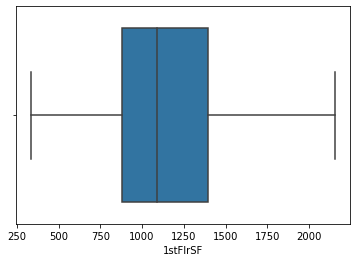

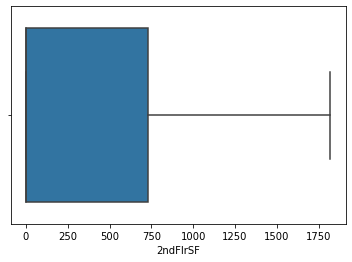

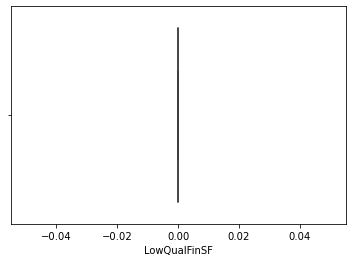

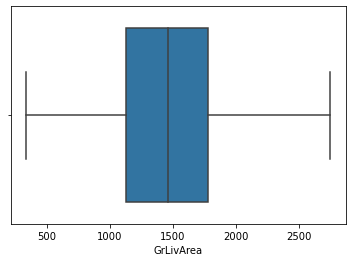

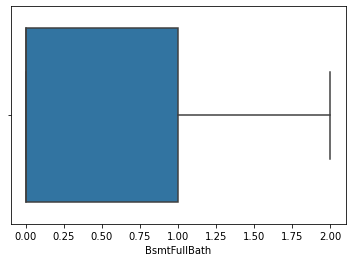

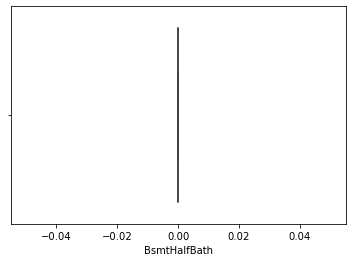

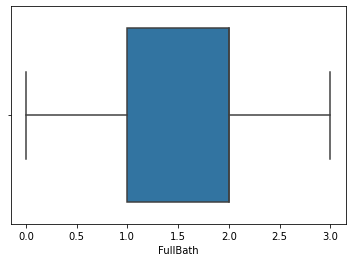

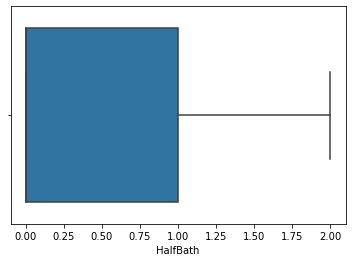

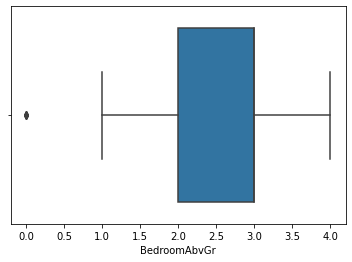

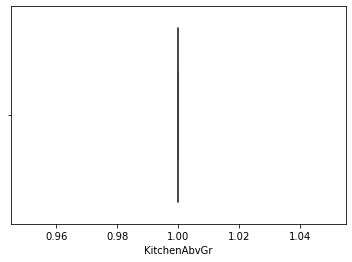

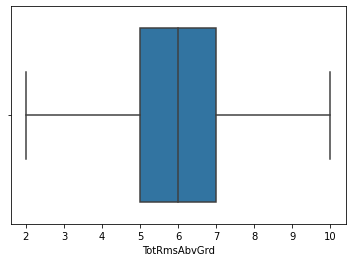

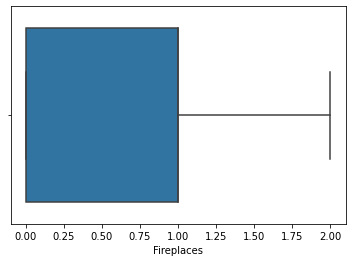

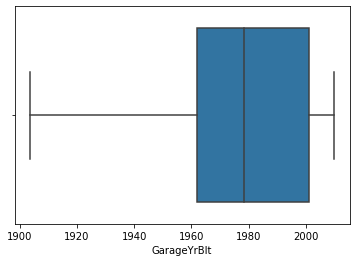

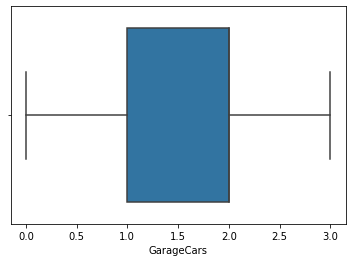

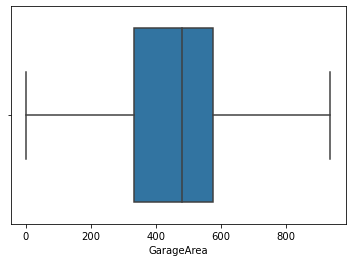

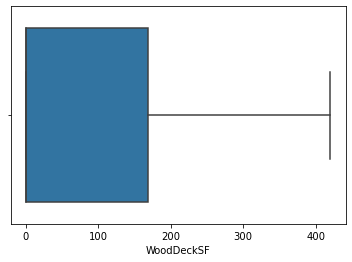

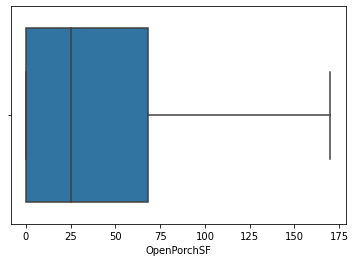

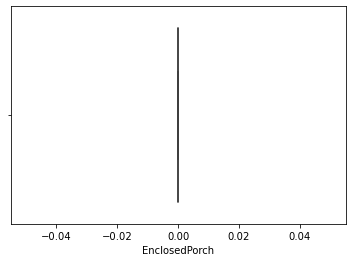

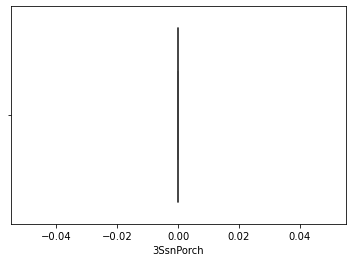

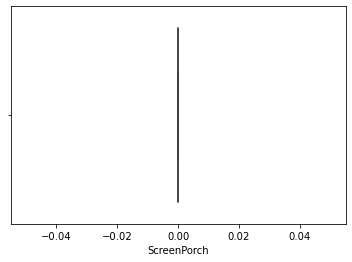

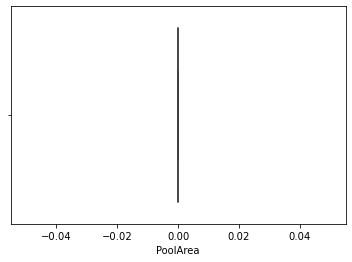

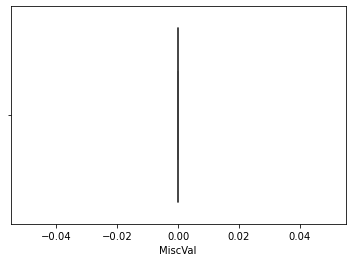

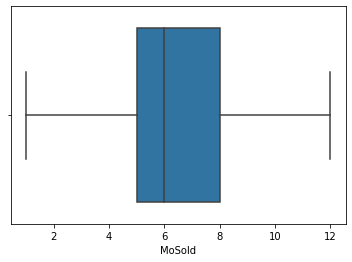

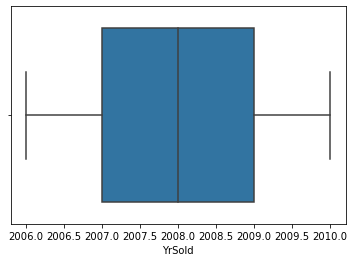

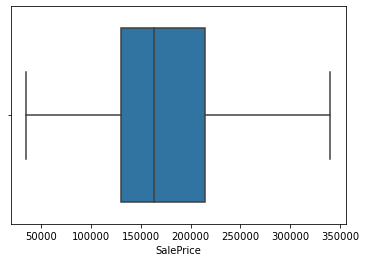

In [34]:
for i in con:
    sb.boxplot(x=t_train[i])
    plt.show()

In [35]:
df = {"train":t_train.columns,"test":t_test.columns}

In [36]:
df

{'train': Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
        'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
        'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
        'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
     

In [37]:
cat = []
con = []
for i in t_test.drop(['Id','MSSubClass','OverallQual','OverallCond'],1).columns:
    if(t_test[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

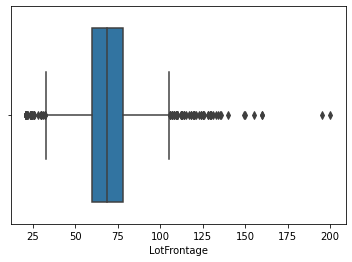

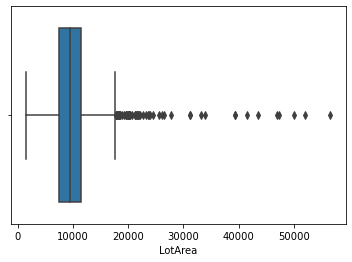

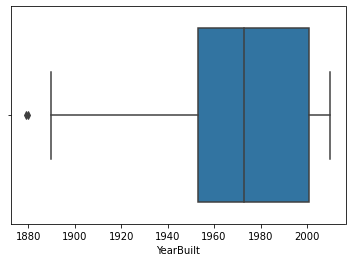

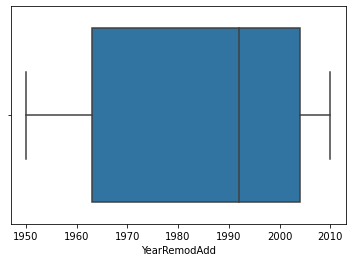

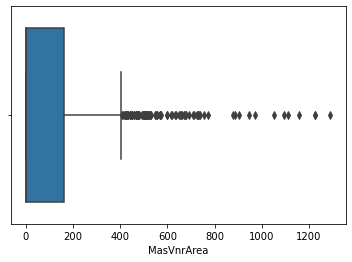

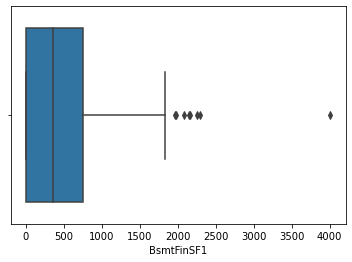

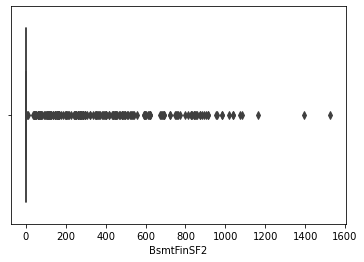

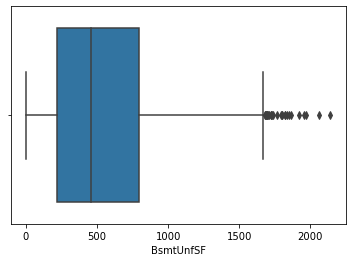

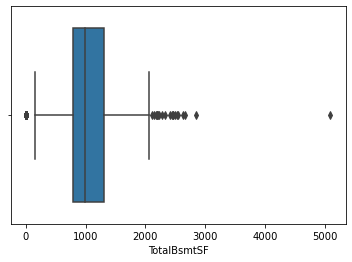

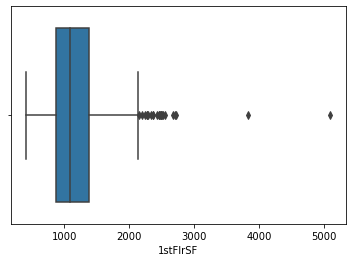

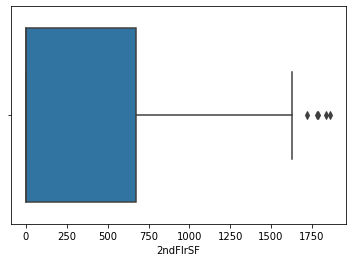

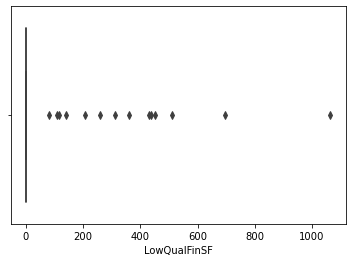

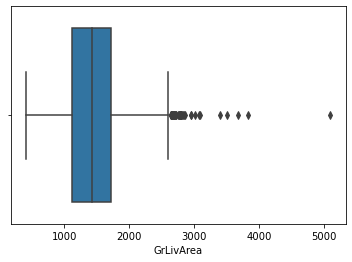

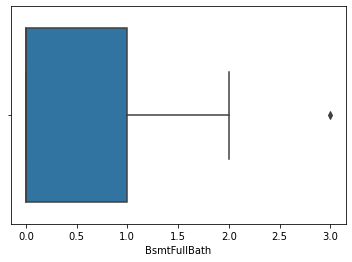

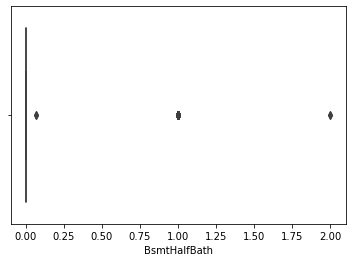

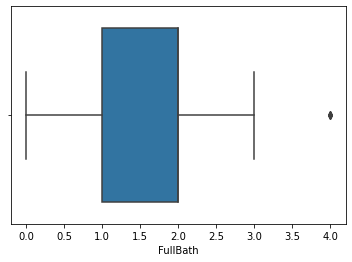

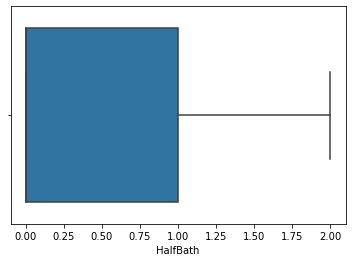

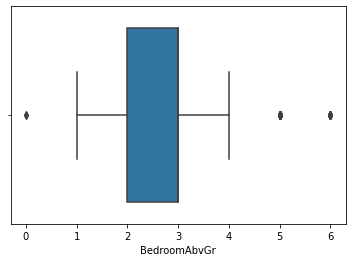

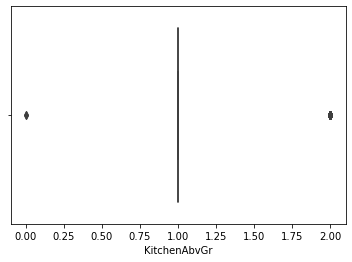

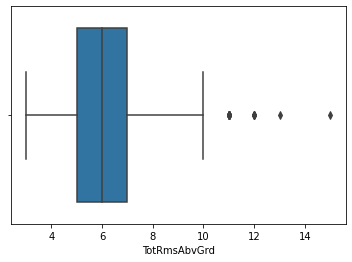

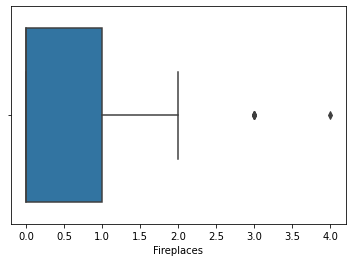

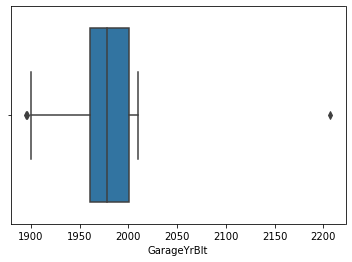

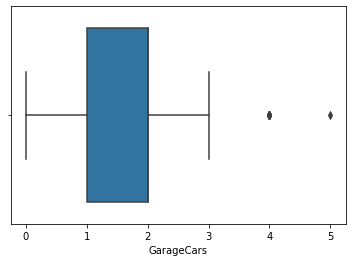

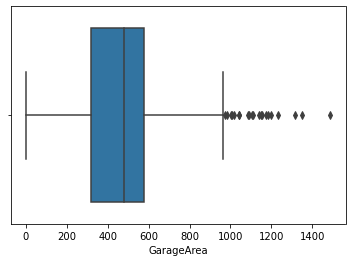

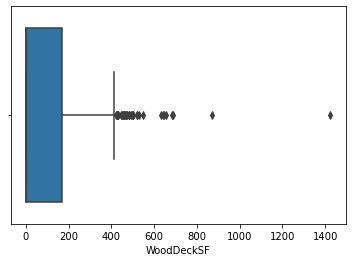

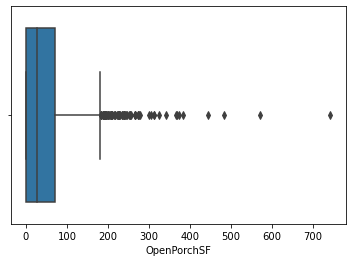

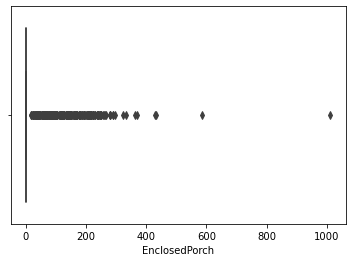

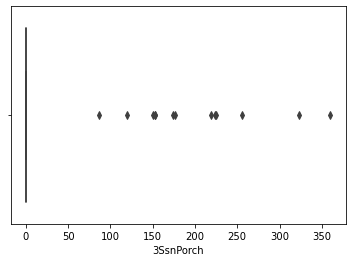

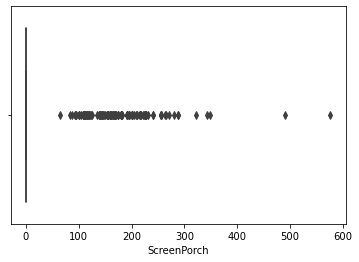

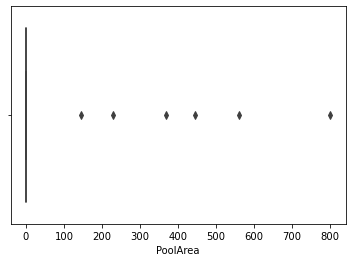

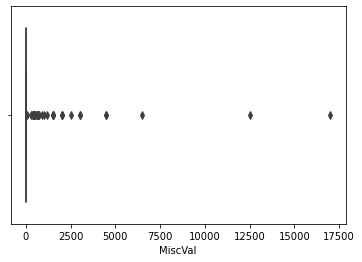

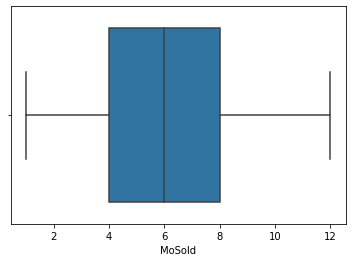

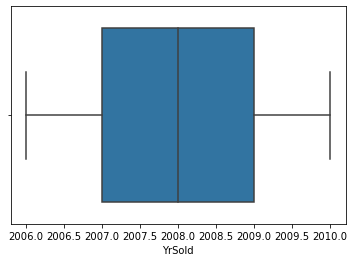

In [38]:
for i in con:
    sb.boxplot(t_test[i])
    plt.show()

In [39]:
def mod_outlier(t_test):
    
    t_test1 = t_test.copy()
    t_test = t_test._get_numeric_data()


    q1 = t_test.quantile(0.25)
    q3 = t_test.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)


    for col in t_test.columns:
        for i in range(0,len(t_test[col])):
            
        
            if t_test[col][i] < lower_bound[col]:
                t_test[col][i] = lower_bound[col]
                

            if t_test[col][i] > upper_bound[col]:
                
                t_test[col][i] = upper_bound[col]
                


    for col in t_test.columns:
                    
        t_test1[col] = t_test[col]
    return(t_test1)

t_test = mod_outlier(t_test)


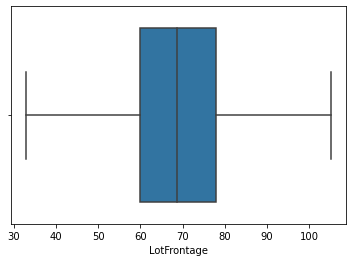

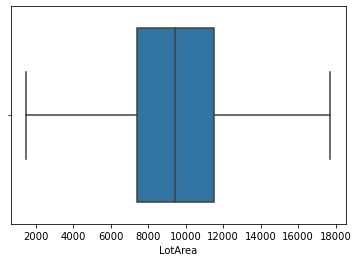

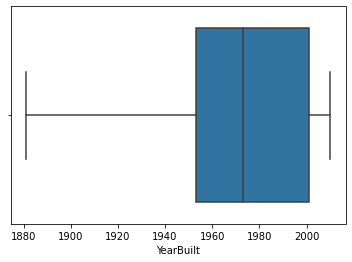

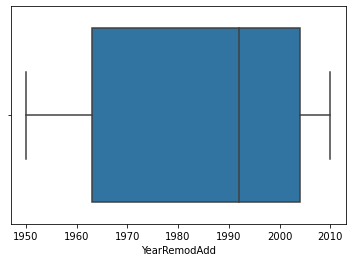

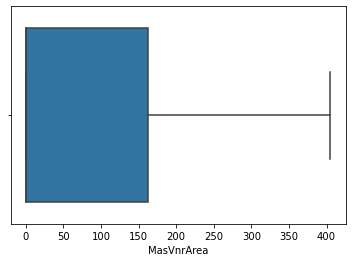

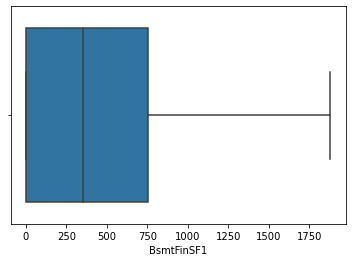

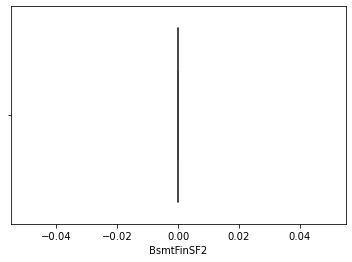

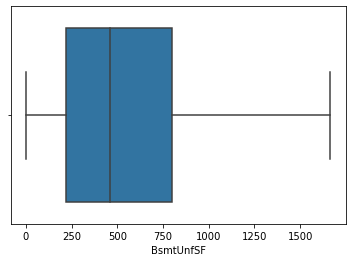

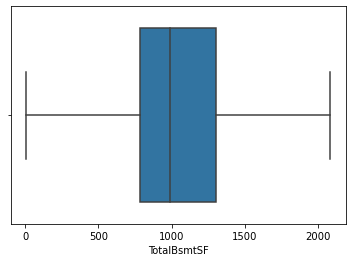

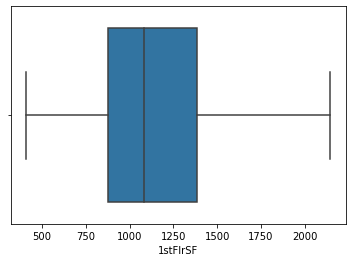

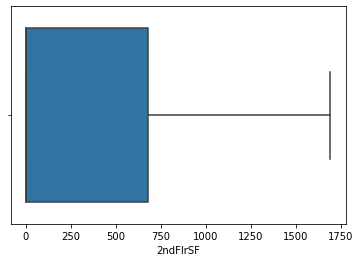

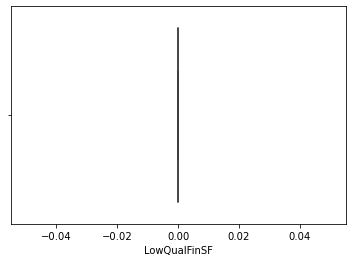

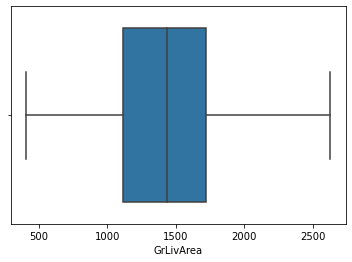

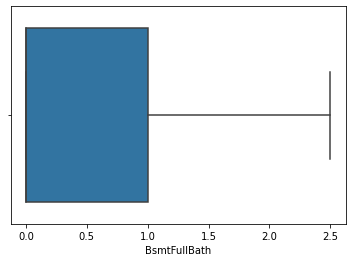

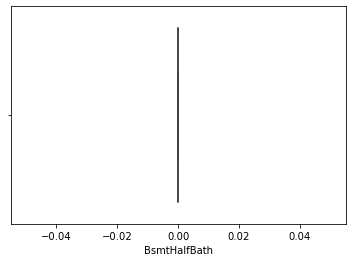

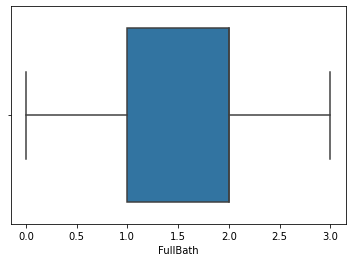

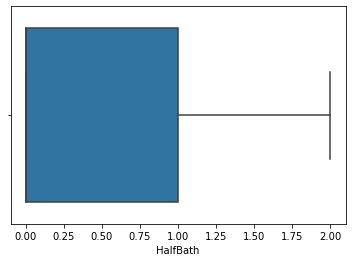

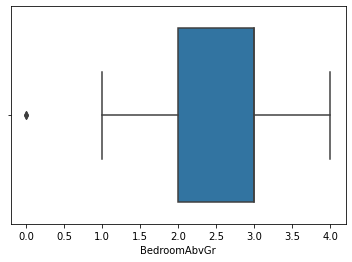

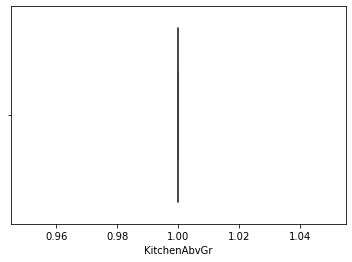

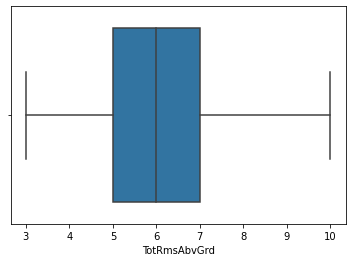

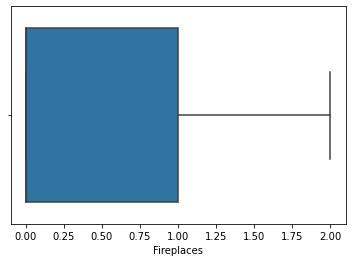

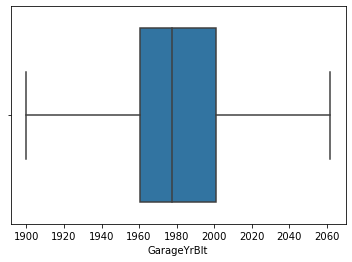

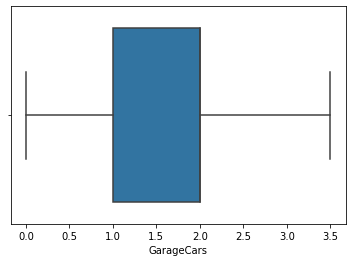

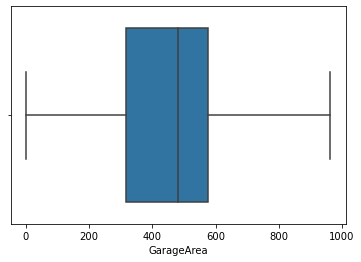

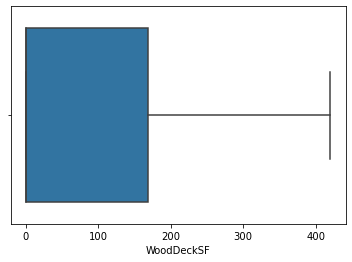

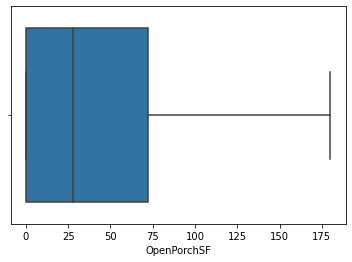

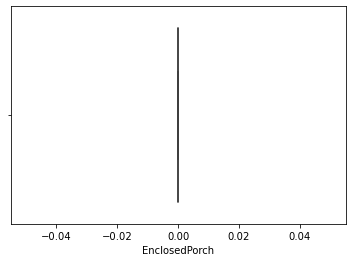

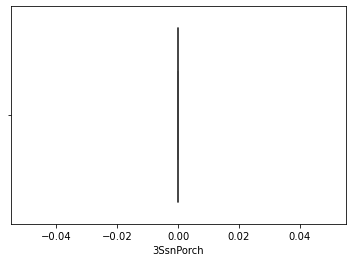

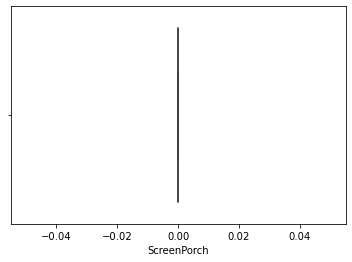

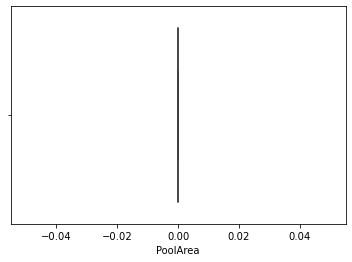

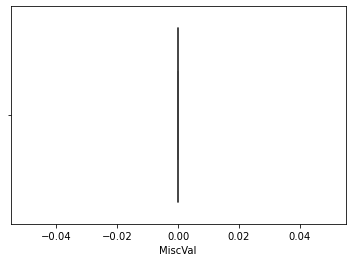

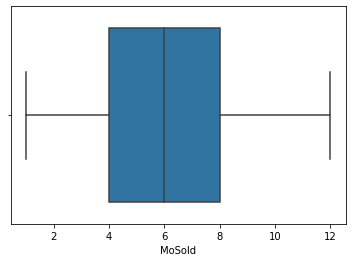

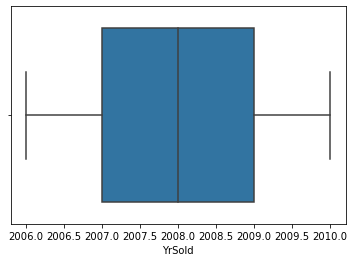

In [40]:
for i in con:
    sb.boxplot(x=t_test[i])
    plt.show()

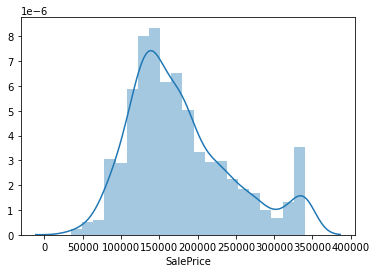

In [41]:
sb.distplot(t_train['SalePrice'])

In [42]:
#normal = (np.log(t_train['SalePrice']))

In [43]:
#sb.distplot(normal)

# Data Visualisation

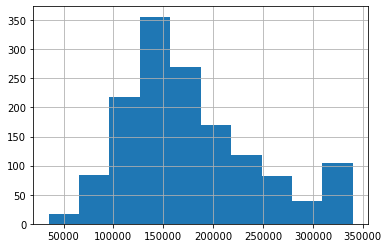

In [44]:
#sb.pairplot(t_train)
#Single columns=cat(Countplot),con(Barplot)
#Multipe columns=con vs con (scatterplot) cat vs con (Boxplot) cat vs cat (Countplot)
#Distribution = distplot
t_train.SalePrice.hist()


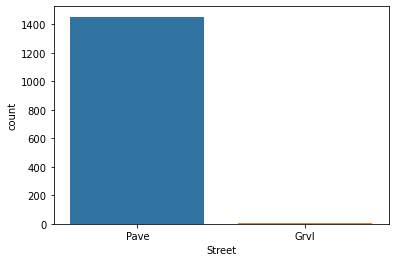

In [45]:
#cat(Single columns)
sb.countplot(t_train['Street'])

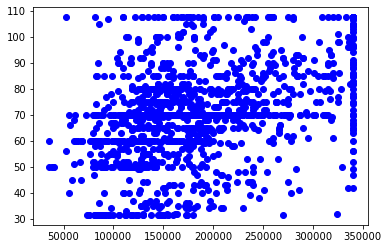

In [46]:
# con Vs con
plt.scatter(t_train.SalePrice,t_train.LotFrontage,c="blue")

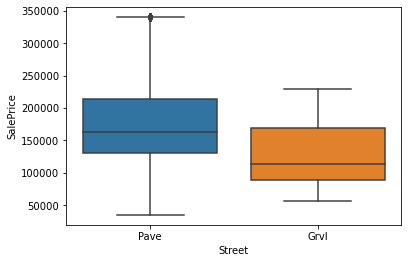

In [47]:
# cat vs con
sb.boxplot(t_train.Street,t_train.SalePrice)

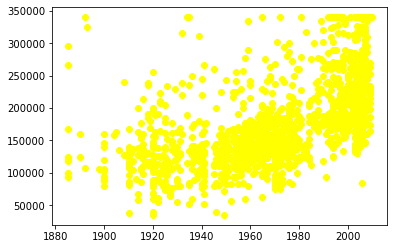

In [48]:
plt.scatter(t_train.YearBuilt,t_train.SalePrice,c="yellow")

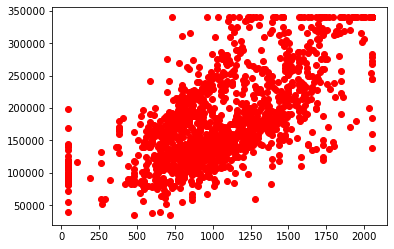

In [49]:
plt.scatter(t_train.TotalBsmtSF,t_train.SalePrice,c="red")

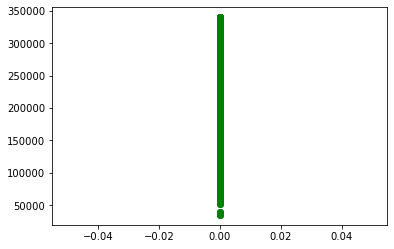

In [50]:
plt.scatter(t_train.PoolArea,t_train.SalePrice,c="green")

In [51]:
#plt.figure(figsize=(8,6))
#fig = sb.boxplot(t_train.OverallQual,t_train.SalePrice)
#fig.axis(ymin=0,ymax=80000)

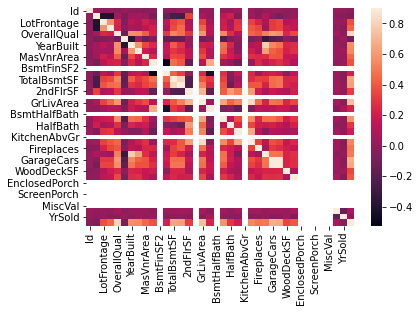

In [52]:
corr_matrix = t_train.corr()
ax1 = sb.heatmap(corr_matrix,vmax=0.9)

# Labelencoder

In [53]:
label = ["BsmtFinSF2","LowQualFinSF","BsmtHalfBath","KitchenAbvGr","EnclosedPorch","3SsnPorch","PoolArea","MiscVal"]
lr = LabelEncoder()
for i in label:
    t_train[i] = lr.fit_transform(t_train[i])


In [54]:
t_train = t_train.drop(["BsmtFinSF2","LowQualFinSF","BsmtHalfBath","KitchenAbvGr","EnclosedPorch","3SsnPorch","PoolArea","MiscVal","YrSold","ScreenPorch"],axis = 1)

In [55]:
t_train.shape

(1460, 67)

In [56]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [57]:
label1 = ["SaleCondition","SaleType","PavedDrive","GarageCond","GarageQual","GarageFinish","GarageType","FireplaceQu","Functional","KitchenQual","MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","Heating","HeatingQC","CentralAir","Electrical","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","MasVnrArea","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",]
for i in label1:
    t_train[i] = lr.fit_transform(t_train[i])
    

In [58]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [59]:
var = t_train[t_train.columns[1:]].corr()["SalePrice"][:]

In [60]:
var

MSSubClass      -0.061456
MSZoning        -0.196852
LotFrontage      0.376300
LotArea          0.435878
Street           0.045075
                   ...   
OpenPorchSF      0.394637
MoSold           0.068075
SaleType        -0.045210
SaleCondition    0.232475
SalePrice        1.000000
Name: SalePrice, Length: 66, dtype: float64

In [61]:
t_train = t_train.drop(["BldgType","Exterior1st","Exterior2nd","Foundation","BsmtFinType2","SaleCondition","RoofStyle"],axis = 1)

In [62]:
t_train.shape

(1460, 60)

In [63]:
label2 = ["SaleCondition","SaleType","PavedDrive","GarageCond","GarageQual","GarageFinish","GarageType","FireplaceQu","Functional","KitchenQual","MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","Heating","HeatingQC","CentralAir","Electrical","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","MasVnrArea","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",]
for i in label2:
    t_test[i] = lr.fit_transform(t_test[i])

In [64]:
t_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int32  
 6   LotShape       1459 non-null   int32  
 7   LandContour    1459 non-null   int32  
 8   Utilities      1459 non-null   int32  
 9   LotConfig      1459 non-null   int32  
 10  LandSlope      1459 non-null   int32  
 11  Neighborhood   1459 non-null   int32  
 12  Condition1     1459 non-null   int32  
 13  Condition2     1459 non-null   int32  
 14  BldgType       1459 non-null   int32  
 15  HouseStyle     1459 non-null   int32  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [65]:
t_test = t_test.drop(["BsmtFinSF2","LowQualFinSF","BsmtHalfBath","KitchenAbvGr","EnclosedPorch","3SsnPorch","PoolArea","MiscVal","YrSold","ScreenPorch","BldgType","Exterior1st","Exterior2nd","Foundation","BsmtFinType2","SaleCondition","RoofStyle"],axis = 1)

In [66]:
t_test.shape

(1459, 59)

# Model Building

In [67]:
X= t_train.drop(['SalePrice'], axis=1)
y= t_train[['SalePrice']]

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=22)


# Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 50,random_state=40,
min_impurity_decrease=0.002,min_weight_fraction_leaf=0.001,min_samples_split=5)
model_6 = RF.fit(X_train,y_train)
y_pred_6 = model_6.predict(X_test)

In [70]:
print(RF.score(X_test,y_test)) #random forest Evaluation

0.8872163923990817


# Evaluation Metrics

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('mean_absolute_error:\n',mean_absolute_error(y_test,y_pred_6)) 
print('mean_squared_error:\n',mean_squared_error(y_test,y_pred_6))

mean_absolute_error:
 15636.417073180854
mean_squared_error:
 507645846.7599932


# Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05,max_depth=4, max_features='sqrt',min_samples_leaf=15, min_samples_split=10,loss='huber', random_state =5)
#RMSE estimated through the partition of the train set
GBoost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=5000,
                          random_state=5)

In [73]:
print(GBoost.score(X_test,y_test))



0.9198067200189786


In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('mean_absolute_error:\n',mean_absolute_error(y_test,y_pred_6)) 
print('mean_squared_error:\n',mean_squared_error(y_test,y_pred_6))

mean_absolute_error:
 15636.417073180854
mean_squared_error:
 507645846.7599932


# Submissions

In [75]:
submission = pd.read_csv('C:\\Users\\Harshita\\Desktop\\House_Prices\\sample_submission.csv')
final_predictions = RF.predict(t_test)
submission['SalePrice'] = final_predictions
#only positive predictions for the target variable
submission['SalePrice'] = submission['SalePrice']
submission.to_csv('C:\\Users\\Harshita\\Desktop\\House_Prices\\my_submission.csv', index=False)